In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from itertools import product
from pathlib import Path
from typing import Tuple

In [2]:
experiment_path =  "/media/roboto/Tranqueiras/entropia_grafos_experimentos/experiment_mu_2_complete"

In [3]:
def get_runs(path: str):
    return [x for x in os.listdir(path) if "run" in x]

In [5]:
mean_stats = {}
kappas = [0, 15, 30]

for k in kappas:
    param = ("complete", 500, 2, 1, k, 0, 0, 0, 0, 2)
    input_path = Path(experiment_path) / str(param)
    runs = get_runs(input_path)
    
    mean_run_stats = {
        "Entropy": np.zeros(50),
        "Proximity": np.zeros(50),
    }

    num_runs = len(runs)
    for run in runs:
        stats = pickle.load(open(input_path / run, "rb"))
        mean_run_stats['Entropy'] += stats['Entropy']
        mean_run_stats['Proximity'] += stats['Proximity']

    mean_run_stats['Entropy'] /= num_runs
    mean_run_stats['Proximity'] /= num_runs
    
    mean_stats[param] = mean_run_stats

FileNotFoundError: [Errno 2] No such file or directory: "/media/roboto/Tranqueiras/entropia_grafos_experimentos/experiment_mu_2_complete/('complete', 500, 2, 1, 0, 0, 0, 0, 0, 2)"

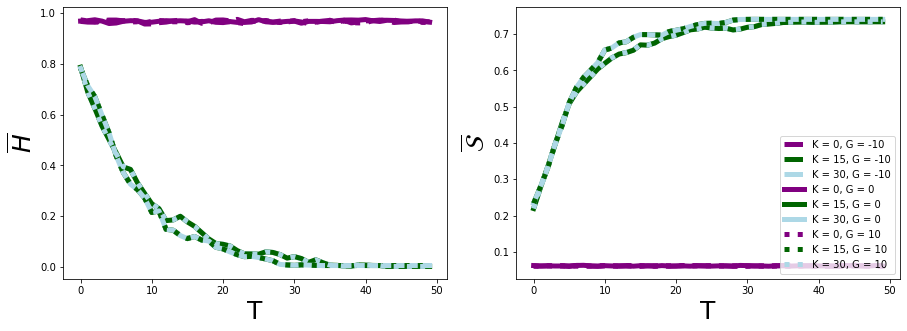

In [56]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.subplots_adjust(wspace = 0.18)
axs[0].set_ylabel(r"$\overline{H}$", fontsize = 25)
axs[1].set_ylabel(r"$\overline{\mathcal{S}}$", fontsize = 25)
for ax in axs:
#     # ax.locator_params(axis='x', nbins=5)
#     # ax.locator_params(axis='y', nbins=5)
#     ax.tick_params(axis='both', which='major', labelsize=15)
#     ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    0: "purple",
    15: "darkgreen",
    30: "lightblue",
}

style = {
    -10: '--',
    0: '-',
    10: ':'
}
kappas = [0, 15, 30]
gammas = [-10, 0, 10]

axs[0].set_ylabel(r"$\overline{H}$", fontsize = 25)
axs[1].set_ylabel(r"$\overline{\mathcal{S}}$", fontsize = 25)
for i in range(len(gammas)):
    for j in range(len(kappas)):
        
        param = ("complete", 50, 2, 1, kappas[j], 0, 0, 0, gammas[i], 2)
        
        results = mean_stats[param]
        mean_entropy = results['Entropy']
        mean_proximity = results['Proximity']
        X = range(len(mean_entropy))
        
        axs[0].plot(X, mean_entropy, label = f'K = {kappas[j]}, G = {gammas[i]}', color = colors[kappas[j]], linestyle = style[gammas[i]], linewidth = 5)
        axs[1].plot(X, mean_proximity, label = f'K = {kappas[j]}, G = {gammas[i]}', color = colors[kappas[j]], linestyle = style[gammas[i]], linewidth = 5)
        
            
axs[1].legend(fontsize = 10, loc = 4)
# fig.savefig("curvas_evolucao_entropia_barabasi.png", bbox_inches='tight')